## Optimization Part 2
Goal: Implement Batch Normalization for weights (per layer).  See student coding steps below for more details.

In [1]:
import os
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
#helper functions
DEBUG = True
def debug(*kargs):
    if DEBUG:
        print(*kargs)

### Defining the activation functions and their derivatives

In [3]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))


def dSigmoid(x):  # derivative of sigmoid
    s = sigmoid(x)
    return np.multiply(s, (1-s))


def relu(z):  # rectified linear unit activation
    return np.maximum(0, z)


def dRelu(z):
    """ 
    Derivative of Rectified Linear Unit

    """
    return 1 * (z > 0)


# Student Coding steps:

 Implement Batch Normalization for backprop in Layer subclass function <def normalize_activation(self, activation)>


In [4]:
class ANN:
    data = []
    layers = []
    inputWidth = 1
    outputWidth = 1

    class Layer:

        """class defining the elements of an ANN layer"""

        @staticmethod
        def gradl2norm(weight_vals):
            """returns the gradient of the l2 norm with respect to the weights"""
            return weight_vals
    
        @staticmethod
        def gradl1norm(weight_vals):
            """returns the gradient of the l1 norm with respect to the weights"""
            return np.sign(weight_vals)

        @staticmethod
        def l2norm(vals):
            """returns the l2 norm of the vals"""
            return np.linalg.norm(vals,ord=2)
    
        @staticmethod
        def l1norm(vals):
            """returns the l1 norm of the vals"""
            return np.linalg.norm(vals,ord=1)
        
        def __init__(self):
            self.w = []
            self.b = []
            self.lam = 0  #for weight regularization
            self.weightRegFunction = self.l2norm  #placeholder for regularization function
            self.weightRegGradFunction = self.gradl2norm   #placeholder for regularization function
            self.batchNormalization = False  #batchNormalization for backpropagation
            self.vel_w=[] # for standard momentum of weight gradients
            self.vel_b=[] # for standard momentum of bias gradients
            self.nodecount = []
            self.activation_fcn = []
            self.activation_fcn_derivative = []
            self.orderNumber = []
            self.previous = None  # link to previous layer
            self.next = None  # link to next layer
            

        def set_weights(self, w, b):
            """set the weights and bias for the layer.  Layer weights should have dimesion: (thislayer_nodecount, previouslayer_nodecount)
            the dimension of the bias should be (thislayer_nodecount,1)"""
            self.w = w
            self.b = b
            return self
        
        def initialize_weights(self, glorot=False, seed=None ):
            assert self.w.size > 0
            assert self.b.size > 0
            np.random.seed(seed)
            if glorot:  #use glorot initialization
                n = self.w.shape[0]
                m = self.w.shape[1]
                self.w = np.zeros(self.w.shape)   #placeholder
                # compute the edges of the glorot-specified uniform distribution and then set self.w to a uniform dist
                # note: use np.random.uniform(loweredge,upperedge,size)
                u_edge = np.sqrt(6/(m+n))
                self.w = np.random.uniform(low=-u_edge,high=u_edge,size=(self.w.shape))
            else:
                self.w = np.random.normal(size=(self.w.shape))  # hidden weight matrix [rows = to, columns = from]
            self.b = np.zeros(self.b.shape)  # hidden biases (column vector)
            
        def initialize_velocity(self):
            assert self.w.size > 0
            assert self.b.size > 0
            self.vel_w = np.zeros(self.w.shape)  # same shape as hidden weight matrix [rows = to, columns = from]
            self.vel_b = np.zeros(self.b.shape)  # same shape as hidden biases (column vector)
        

        def set_lambda(self, lam):
            self.lam = lam

        def set_weightRegFunction(self, fcn, d_fcn):
            self.weightRegFunction = fcn
            self.weightRegGradFunction = d_fcn
            
        def set_activation(self, activation_fcn):
            self.activation_fcn = activation_fcn
            return self

        def set_activation_deriv(self, activation_fcn):
            if activation_fcn == sigmoid:
                self.activation_fcn_derivative = copy.deepcopy(dSigmoid)
            elif activation_fcn == relu:
                self.activation_fcn_derivative = copy.deepcopy(dRelu)
            else:
                self.activation_fcn_derivative = None
                
        def display_params(self):
            """displays the weights and biases of the layer (rows = to, colums = from)"""
            for outNum in range(self.w.shape[0]):
                print(self.w[outNum,:], "  ", self.b[outNum])
        

        def compute_pre_activation(self, inputs):
            net = np.dot(self.w, inputs) + self.b
            return net

        def compute_bias_gradient(self, gradient):
            g = np.mean(gradient, axis=1)[:, np.newaxis]  # no regularization
            return g

        def compute_weight_gradient(self, inputs, gradient):
            g = np.dot(gradient, inputs.T)
            g = g/inputs.shape[1]   #divide by m (batchsize)
            return g

        def compute_activation(self, net):
            return self.activation_fcn(net)

        def compute_activation_derivative(self, net):
            return self.activation_fcn_derivative(net)

        def compute_activation_gradient(self, net, gradient):
            g = np.multiply(gradient, net)
            return g

        def compute_forward(self, inputs):
            """Returns layer ouput from input (shape = [nodeCount, input]) of the weighted input plus bias
            input shape must be [lastlayer_nodeCount, samples] or [featurecount, samplecount] """
            net = self.compute_pre_activation(self, inputs)
            layer_out = self.compute_activation(net)
            return layer_out


        def regularization_grad_weights(self,vals):
            """computes the regularization cost for the current layer weights"""
            mylam = self.lam
            myregs = self.weightRegGradFunction(vals)
            return mylam*myregs
        
        
        def normalize_activation(self, activation):
            """computes and returns normalized activations for use in batch normalization computations"""
            
            batchsize = activation.shape[1]
            activation_mu = np.zeros(shape=(activation.shape[0],1)) #placeholder must be shape ([nodecount, 1])
            delta = 10e-8
            activation_sigma = np.ones(shape=(activation.shape[0],1)) #placeholder must be shape ([nodecount, 1])
            activation_norm = activation #placholder must be same shape as activation ([nodecount, batchsize])
           
            ############### STUDENT CODE FOR BATCH NORMALIZATION ###############
           
            #compute the mean of the activation: activation_mu (shape=[nodecount, 1])
            
            #subtract the activation_mu from the activation matrix; must be shame shape as activation
            #hint, use np.subtract() to broadcast
 
            #compute the sigma of the activation (shape=[nodecount, 1]) 

            #compute new normalized activations h_prime from original activation ([nodecount, batchsize])

            ########################## END STUDENT CODE ########################
            return activation_norm  #must be of shape [nodecount,batchsize]

        
        def compute_layer_gradients(self, net, activation, gradient):
            """ computes the loss gradient with respect to desired output of the layer
            a set of desired targets is assumed to be matrix of shape [nodecount, samples]: SGD will have [nodecount,1]
            hidden_inputs is assumed to be a matrix of shape [hiddenNodeCount, samples]
            
            This follows algorithm 6.4 line by line in the book!
            
            """
            
            # f'(a(k))
            d_activation = self.compute_activation_derivative(net)  # derivative of sigmoid:  shape = [NodeCount, samples]
            
            # g <- g * f'(a(k))
            g_loss = self.compute_activation_gradient(d_activation, gradient)  # shape = [NodeCount, samples]  for outer layer
            
            # Delta_b(k) J = g (Take the mean across all 4 samples (batch))
            g_loss_b = self.compute_bias_gradient(g_loss)  # mean gradient with respect to BIAS, shape = [NodeCount, 1]
            
            # Delta w(k) J = g * h(k-1) +lam*regularizationGrad w.r.t weights
            if self.batchNormalization == False:
                g_loss_w = self.compute_weight_gradient(activation, g_loss) + self.regularization_grad_weights(self.w) # [thisLayerNodecount,prevLayerOutputcount]  
                #NOTE - regularization grad weights NOT WORKING YET
            else: #use batch normalization
                n_activation = self.normalize_activation(activation)
                #debug("--normalized activation shape:", n_activation.shape)
                g_loss_w = self.compute_weight_gradient(n_activation, g_loss) + self.regularization_grad_weights(self.w) # [thisLayerNodecount,prevLayerOutputcount]  
                
            
            # g <- W(k).T * g
            g_loss_backprop = np.dot(self.w.T, g_loss)  # gradient to propagate back, shape = [hiddenNodeCount,samples]
            
            return g_loss_w, g_loss_b, g_loss_backprop

        def update_Layer(self, weightUpdate, biasUpdate, momentum=0):
            """Update weights and biases. weightUpdate is shape [thisLayerNodecount,prevLayerOutputcount]; biasUpdate is shape [thisLayerNodecount,1]"""
            if momentum == 0:  #note this if-else statement not required if written as math eq with momentum & velocity >> more efficient!
                self.w = self.w + weightUpdate
                self.b = self.b + biasUpdate
            else:  #note this if-else statement not required if written as math eq with momentum & velocity
                # need to compute the new values for self.w and self.b using momentum
                # note: momentum is passed in but velocity must be updated & stored in self.vel_w and self.vel_b
                self.vel_w = momentum*self.vel_w+weightUpdate
                self.vel_b = momentum*self.vel_b+biasUpdate
                self.w = self.w + self.vel_w
                self.b = self.b + self.vel_b


    def __init__(self):
        self.data = []
        self.layers = []
        self.inputWidth = 1
        self.outputWidth = 1
    
        
    def set_input_width(self, inputWidth):
        """defines the input layer width for the network"""
        self.inputWidth = inputWidth

    def add_layer(self, nodecount=1, activation_fcn=relu):
        """adds a layer to the neural network and returns the layer"""
        oldLayerCount = len(self.layers)
        thislayer = ANN.Layer()
        thislayer.orderNumber = oldLayerCount + 1
        if oldLayerCount > 0:  # other layers have been added already
            lastLayer = self.layers[-1]
            lastLayer.display_params()
            thislayer.previous = lastLayer
            lastLayer.next = thislayer
            layerInputSize = lastLayer.w.shape[0]
        else:  # this will be the first layer
            layerInputSize = self.inputWidth
            
        thislayer.w = np.zeros((nodecount, layerInputSize))  #[NODECOUNT,FROM]
        thislayer.b = np.zeros((nodecount, 1 )) #[NODECOUNT,FROM]
        thislayer.vel_w = np.zeros(thislayer.w.shape)  # same shape as hidden weight matrix [rows = to, columns = from]
        thislayer.vel_b = np.zeros(thislayer.b.shape)  # same shape as hidden biases (column vector)

        thislayer.activation_fcn = activation_fcn
        thislayer.set_activation_deriv(activation_fcn)
        self.outputWidth = nodecount
        self.layers = self.layers + [thislayer]
        return thislayer
    
    def initialize(self, glorot = False, batchNormalization=False, seed = None):
        """initialize weights & biases & velocity: overwrites current network parameters"""
        for layer in self.layers:
            layer.initialize_weights(glorot=glorot, seed=seed)
            layer.initialize_velocity()
            layer.batchNormalization = batchNormalization  #note that all layers will have this True or False when initialized
            
    def setL1weightNormalization(self,lam=0):
        for idx,layer in enumerate(self.layers):
            layer.set_lambda(lam)
            layer.set_weightRegFunction(layer.l1norm,layer.gradl1norm)
            print(" Set Layer ", idx," weightNorm to gradl1norm with lambda = ", lam)
            

    def setL2weightNormalization(self,lam=0):
        for idx,layer in enumerate(self.layers):
            layer.set_lambda(lam)
            layer.set_weightRegFunction(layer.l2norm,layer.gradl2norm )
            print(" Set Layer ", idx," weightNorm to gradl2norm with lambda = ", lam)

            
    def summary(self):
        """displays a summary of the model"""
        tot_train_parameters = 0
        print("\n")
        print("Layer     Inshape     Outshape     Param #     LambdaReg")
        print("==========================================================")
        for lnum, layer in enumerate(self.layers):
            inshape = layer.w.shape[1]
            weightCount = layer.w.shape[0]*layer.w.shape[1]  #assume fully connected
            biasCount = layer.b.shape[0]
            thislayerparams = weightCount+biasCount
            tot_train_parameters += thislayerparams
            lam = layer.lam
            print("% 3d       % 3d         % 3d         %3d         %3f" %(lnum,inshape,biasCount,thislayerparams,lam))
        print("==========================================================")
        print("total trainable params: ",tot_train_parameters )
        
    def display_params(self):
        """displays the weights and biases of the network (rows = to, colums = from)"""
        print("\n")
        print("input width: ", self.inputWidth)
        for lnum, layer in enumerate(self.layers):
            print("Layer ",lnum)
            layer.display_params()
        print("output width: ", layer.w.shape[0])
                
                
    def forwardPropagation(self, inputs):
        """Compute forward pass of two layer network
        inputs are assumed to be (shape=[sampleCount,featureCount])
        returns a matrix of raw outputs with one row of output per node (shape=[sampleCount, outputNodeCount])
        Internal matrices are shaped for efficiency to avoid internal transposes (columns hold observations/samples) """

        # inputs and outputs will be transposed for efficiency during forwardPropagation and untransposed before returning

        nets = []
        activations = []
        layer_input = inputs.T

        for lnum, layer in enumerate(self.layers):
            # inputs = inputs + inputs
            layer_net = layer.compute_pre_activation(layer_input)
            nets.append(layer_net)

            layer_out = layer.compute_activation(layer_net)
            activations.append(layer_out)

            layer_input = layer_out
        raw_output = layer_out.T
        return raw_output, inputs, nets, activations

    def backPropagation(self, inputs, desiredOutputs, learningRate, momentum=0):
        w_grads = []
        b_grads = []
        # store nets and activations for each layer
        raw_output, _, nets, activations = self.forwardPropagation(inputs)
        layer_desired_out = desiredOutputs

        # Note: This is only part of the gradient
        layer_grad = desiredOutputs - raw_output
        layer_grad = layer_grad.T  #in order to match expectation for last layer output
        prev_layer_outputs = [inputs.T] + activations  #insert inputs onto activation stream for easy computations

        #  computation of full gradient handled inside the loop below
        for lnum, layer in reversed(list(enumerate(self.layers))):
            #get the input to this layer
            curr_layer_input=prev_layer_outputs[lnum]
            #get the gradients for the layer    
            w_grad, b_grad, loss_grad = layer.compute_layer_gradients(nets[lnum], curr_layer_input, layer_grad)    

            layer.update_Layer(w_grad * learningRate, b_grad * learningRate, momentum=momentum)
            layer_grad = loss_grad

    def predict(self, X, threshold=0.5):
        """Compute predictions using forward propagation for single binary classification at threshold
        X is a standard dataFrame without biases (shape=[observationCount,featureCount])
        returns a standard column vector of binary predictions in {0,1}: (shape=[observationCount, 1])"""
        raw_predictions, net_inputs, net_lst, activation_lst = self.forwardPropagation(X)
        preds = raw_predictions > threshold
        return preds

    def compute_loss(self, inputs, desired_targets):
        """computes the (scalar) loss using MSE of a set of targets and sigmoid outputs
        inputs is assumed to be a matrix of shape [samples, features]
         desired_targets is assumed to be a matrix of shape [samples, 1]"""
        raw_outputs = self.forwardPropagation(inputs)[0]
        error = desired_targets - raw_outputs
        mse = np.dot(error.T, error) / error.size
        return mse

    def fit(self, tngInputs, tngTargets, valInputs, valTargets, learningRate, learningRateDecay,
            batchsize = 1, momentum=0, valPatience=0, tolerance=1e-2, maxEpochs = 100):
        """fit model to map tngInputs to tngTargets. If valPatience > 0 then use early stopping on valInputs & valTargets
        returns training loss history and val loss history """
        done = False
        tng_loss_history = []
        val_loss_history = []
        print("Training Model...")
        epoch = 0
        #get current val performance
        valPreds = self.predict(valInputs)
        prev_val_loss = self.compute_loss(valInputs, valTargets).item()
        val_loss_history.append(prev_val_loss)
        val_epochs_nonimproved = 0
        training_count = tngInputs.shape[0]
        if batchsize>training_count: batchsize=training_count #prevent sampling beyond training size
            
        
        while not done:
            epoch+=1
            if epoch>maxEpochs: 
                done = True
            learningRate = learningRate * learningRateDecay
            tngPreds = self.predict(tngInputs)
            tngCorrect = tngTargets == tngPreds
            curr_train_loss = self.compute_loss(tngInputs, tngTargets).item()
            tng_loss_history.append(curr_train_loss)
            #evaluate validation performance
            valPreds = self.predict(valInputs)
            cur_val_loss = self.compute_loss(valInputs, valTargets).item()

            if cur_val_loss < tolerance:  #regular stopping
                done = True
                print(" --- Regular Stopping due to val loss < tolerance; val loss:", cur_val_loss)
                break
            
            # run an epoch of backprop
            #shuffle the indexes of the inputs & targets simultaneously
            order=np.random.permutation(training_count)
            #debug("range check ", np.arange(training_count))
            #debug("tng count:", training_count, ";   tng index order: ", order)
            first_tng_index=0
            last_tng_index = batchsize
            
            tinp = tngInputs[order]
            ttar = tngTargets[order]
            
            while last_tng_index<=training_count:
                #get a batch
                batchIn = tinp[first_tng_index:last_tng_index,:]
                batchTar = ttar[first_tng_index:last_tng_index,:]
                #train on the batch using backprop
                self.backPropagation(batchIn, batchTar, learningRate=learningRate, momentum=momentum)
                first_tng_index+=batchsize
                last_tng_index+=batchsize
                #handle mis-aligned training set sizes
                if first_tng_index < training_count-1 and last_tng_index>training_count-1:
                    batchIn=tinp[first_tng_index:training_count,:]
                    batchTar=ttar[first_tng_index:training_count,:]
                    self.backPropagation(batchIn, batchTar, learningRate=learningRate, momentum=momentum)
            

            # Early Stopping via VAL loss improvement
            # if validation loss has not improved in patience epochs then stop
            if cur_val_loss < prev_val_loss:
                val_epochs_nonimproved = 0
                prev_val_loss = cur_val_loss
            else:
                val_epochs_nonimproved+=1
                if valPatience > 0 and val_epochs_nonimproved > valPatience :
                    print(" --- EARLY STOPPING ACTIVATED AT val_epochs_nonimproved =  ",val_epochs_nonimproved)
                    done=True

            val_loss_history.append(cur_val_loss)
            
        print("Training Complete!")

        return tng_loss_history, val_loss_history

---

### Helper function to produce datasets for logic gates

In [5]:
def get_input_output_data(gate='XOR'):
    """ Two dimensional inputs for logic gates

    Parameters
    ----------
    gate : str
        Must be either AND, OR, XOR

    Returns
    -------
    X : array-like, shape(samples, features)
        Two dim input for logic gates

    truth[gate] : array-like, shapes(samples, )
        The truth value for this logic gate

    """

    X = np.array([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])

    truth = {
        'AND': np.array([0, 0, 0, 1]),
        'OR': np.array([0, 1, 1, 1]),
        'XOR': np.array([0, 1, 1, 0])
    }

    return X, truth[gate][:, np.newaxis]

## Helper functions - Visualization

For displaying graphical output

In [6]:
def dataplotter(featureData, labelData, title):
    '''plot annotated points to show where the boolean inputs lie on the graph''' 

    fig, ax = plt.subplots()

    xmin, xmax = np.min(featureData[:, 0]) - 0.1, np.max(featureData[:, 0]) + 0.1
    ymin, ymax = np.min(featureData[:, 1]) - 0.1, np.max(featureData[:, 1]) + 0.1

        
#     ax.scatter(featureData[:, 0], featureData[:, 1], color='b', alpha=0.2)
    for i, txt in enumerate(labelData):
        ax.annotate(txt.item(), (featureData[i, 0], featureData[i, 1]))

        # adjust the axis & add labels for the graph
    plt.axis([xmin, xmax, ymin, ymax])
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.title(title)
    plt.show()
    




def makeDecisionBoundaryBool2(model, featureData, labelData, title):
    '''Build decision boundary figrue for 2-input, 1-output boolean logic functions
    Note that this assumes a hard sigmoid was used and establishes a cutoff at 0.5
    for predicting 0 or 1'''
    cutoff = 0.5  # 0.5 for Sigmoid. 0.0 for TANH
    fig, ax = plt.subplots()

    xmin, xmax = np.min(featureData[:, 0]) - 0.1, np.max(featureData[:, 0]) + 0.1
    ymin, ymax = np.min(featureData[:, 1]) - 0.1, np.max(featureData[:, 1]) + 0.1

    # Create filled countour map to color both sides of the boundary
    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X, Y = np.meshgrid(x, y)
    grid = np.c_[X.ravel(), Y.ravel()]
    preds = model.predict(grid)  # get predictions
    z = preds.reshape(X.shape) > cutoff  # cutoff on predictions to return boolean output
    plt.contourf(X, Y, z, cmap='YlOrBr')

    # add annotated points to show where the boolean inputs lie on the graph
    ax.scatter(featureData[:, 0], featureData[:, 1], color='b', alpha=0.5)
    for i, txt in enumerate(labelData):
        ax.annotate(txt.item(), (featureData[i, 0], featureData[i, 1]))

        # adjust the axis & add labels for the graph
    plt.axis([xmin, xmax, ymin, ymax])
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.title(title)
    plt.show()


def show2dFunctionOutput(model_function, featureData, labelData, title):
    """display results of arbitrary model function on 2-input (x1,x2) , 1-output (z) graphs"""
    # cutoff = 0.5  # 0.5 for Sigmoid. 0.0 for TANH
    fig, ax = plt.subplots(figsize=(8,5))

    xmin, xmax = np.min(featureData[:, 0]) - 0.1, np.max(featureData[:, 0]) + 0.1
    ymin, ymax = np.min(featureData[:, 1]) - 0.1, np.max(featureData[:, 1]) + 0.1

    # Create filled countour map to color both sides of the boundary
    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X, Y = np.meshgrid(x, y)
    grid = np.c_[X.ravel(), Y.ravel()]
    outputs, _, _, _ = model_function(grid)  # get predictions
    z = outputs.reshape(X.shape)  # reshape predictions for 2d representation
    plotlevels = np.linspace(0.,1., 25)  # split colors between 0 and 1
    CS = plt.contourf(X, Y, z, levels = plotlevels, cmap='YlOrBr')

    # add annotated points to show where the boolean inputs lie on the graph
    ax.scatter(featureData[:, 0], featureData[:, 1], color='b', alpha=0.5)
    for i, txt in enumerate(labelData):
        ax.annotate(txt.item(), (featureData[i, 0], featureData[i, 1]))

    
    cbar = plt.colorbar(CS)
    cbar.ax.set_ylabel('raw network output')
    # adjust the axis & add labels for the graph
    plt.axis([xmin, xmax, ymin, ymax])
    plt.ylabel('x2')
    plt.xlabel('x1')

    plt.title(title)
    plt.show()
    
def showLossHistory(tng_loss_history=[],val_loss_history=[],semilog=True,plotname=""):
    plt.figure()
    if semilog:
        plt.semilogy(tng_loss_history,'r', label = "Training Loss")
        plt.semilogy(val_loss_history, 'b', label = "Validation Loss")
        plt.ylabel("Loss (MSE) - semilog scale")

    else:    
        plt.plot(tng_loss_history,'r', label = "Training Loss")
        plt.plot(val_loss_history, 'b', label = "Validation Loss")
        plt.ylabel("Loss (MSE)")
    plt.xlabel("iteration")
    plt.legend()
    plt.title(plotname+" Loss over iterations")
    plt.show() 
    

### Helper function to instantiate an ANN from parameters

In [7]:
def make_ANN_model(input_width = 2,
                   layer_widths = [2,1],
                   layer_activiations = [sigmoid,sigmoid],
                   batchNormalization = False,
                  glorot = False):
    model = ANN()
    print(list(zip(layer_widths,layer_activiations)))
    model.set_input_width(input_width)
    for lnum,(layerWidth,layerActivation) in enumerate(zip(layer_widths,layer_activiations)):
        model.add_layer(nodecount = layerWidth, activation_fcn=layerActivation)
    model.initialize(glorot=glorot, batchNormalization=batchNormalization)
    return model
        
 
    
    

---

### Helper function to train an ANN from parameters.  Allows for separate training and validation data

In [8]:
def train_ANN_model(model=None,
                    trainX = None, trainY = None,
                    valX=None,valY=None,
                    learning_rate=1.0,
                    lr_decay=0.999,
                    batchsize = 1,
                    momentum = 0,
                    valPatience=0,
                    maxEpochs = 100):
    
    

    preds = model.predict(valX)
    correct = valY == preds
    print("BEFORE TRAINING (randomized weights)")
    model.display_params()
    tng_loss_history,val_loss_history = model.fit(tngInputs=trainX, tngTargets=trainY, valInputs=valX, valTargets = valY,
                                                  learningRate=learning_rate, learningRateDecay=lr_decay, batchsize=batchsize,
                                                  momentum = momentum, valPatience=valPatience,
                                                  tolerance=1e-1, maxEpochs=maxEpochs)

    preds = model.predict(valX)
    correct = valY == preds

    print("AFTER TRAINING (learned model weights)")
    model.display_params()

    show2dFunctionOutput(model.forwardPropagation, X, Y, "Raw Response of Network")
    makeDecisionBoundaryBool2(model, X, Y, "XOR predictions from Network")

    plt.figure()
    plt.plot(tng_loss_history,'r')
    plt.plot(val_loss_history, 'b')
    plt.xlabel("iteration")
    plt.ylabel("Loss (mse)")
    plt.title("Loss over iterations")
    plt.show() 

# Simple network without Batch normalization
this is a 2,1 fully connected sigmoid network.  works some of the time...

[(2, <function sigmoid at 0x000001918CDFEB88>), (1, <function sigmoid at 0x000001918CDFEB88>)]
[0. 0.]    [0.]
[0. 0.]    [0.]
empty model info


Layer     Inshape     Outshape     Param #     LambdaReg
  0         2           2           6         0.000000
  1         2           1           3         0.000000
total trainable params:  9
BEFORE TRAINING (randomized weights)


input width:  2
Layer  0
[-1.52708136  1.3425575 ]    [0.]
[ 0.52207671 -0.58826981]    [0.]
Layer  1
[-1.29579974  1.50804186]    [0.]
output width:  1
Training Model...
 --- Regular Stopping due to val loss < tolerance; val loss: 0.09999664963108724
Training Complete!
AFTER TRAINING (learned model weights)


input width:  2
Layer  0
[-3.70385104  4.04112044]    [2.26129977]
[-2.13130309  1.90831574]    [-0.95510777]
Layer  1
[-3.52901856  3.48967816]    [1.51889113]
output width:  1


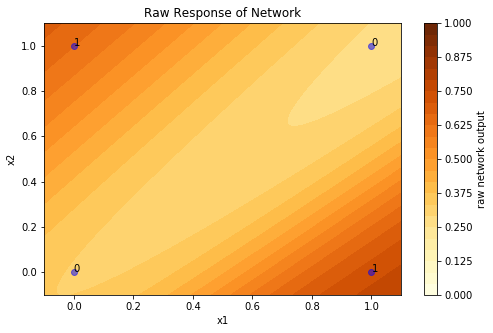

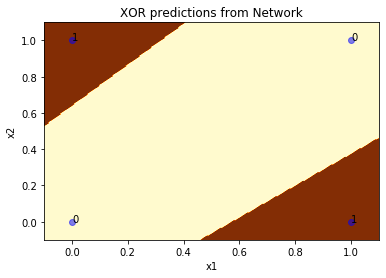

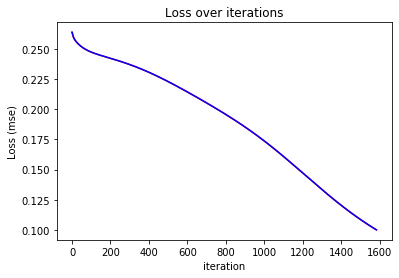

In [9]:
model = make_ANN_model(input_width = 2,
                       layer_widths = [2,1],  #number of nodes in each layer
                       layer_activiations = [sigmoid,sigmoid],
                       batchNormalization=False,
                       glorot=False)  #activations at each layer

print("empty model info")
model.summary()

X, Y = get_input_output_data(gate='XOR')

trainX = X
trainY = Y
valX = X
valY = Y

train_ANN_model(model,trainX,trainY,valX,valY,
                learning_rate=1.0,lr_decay=0.999, batchsize=4, 
                momentum = 0, valPatience = 0, maxEpochs = 5000)

# Simple network with batch normalization
this is a 2,1 fully connected sigmoid network.  works some of the time...
dont forget you need batchsize > 1 for this to work

[(2, <function sigmoid at 0x000001918CDFEB88>), (1, <function sigmoid at 0x000001918CDFEB88>)]
[0. 0.]    [0.]
[0. 0.]    [0.]
empty model info


Layer     Inshape     Outshape     Param #     LambdaReg
  0         2           2           6         0.000000
  1         2           1           3         0.000000
total trainable params:  9
BEFORE TRAINING (randomized weights)


input width:  2
Layer  0
[-0.89443371 -0.39340715]    [0.]
[0.24534725 1.37998866]    [0.]
Layer  1
[-1.2595965  -1.12166357]    [0.]
output width:  1
Training Model...
Training Complete!
AFTER TRAINING (learned model weights)


input width:  2
Layer  0
[-4.00593288 -4.38753603]    [0.67474851]
[0.71938108 1.91058693]    [-1.32102038]
Layer  1
[-4.45521265 -2.19206957]    [1.83536071]
output width:  1


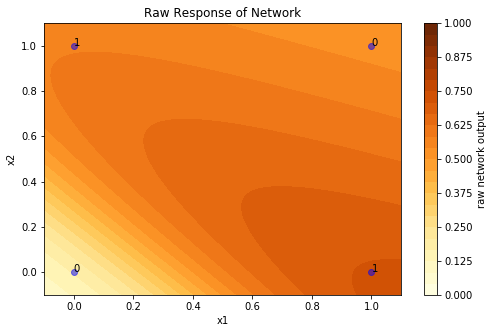

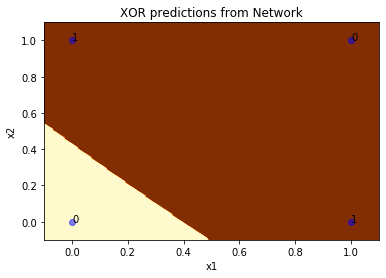

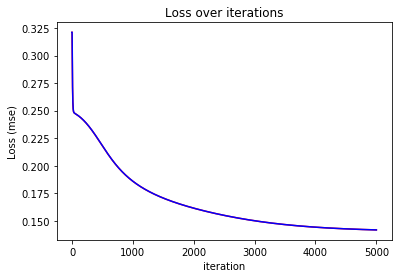

In [10]:
model = make_ANN_model(input_width = 2,
                       layer_widths = [2,1],  #number of nodes in each layer
                       layer_activiations = [sigmoid,sigmoid],
                       batchNormalization=True,
                       glorot=False)  #activations at each layer

print("empty model info")
model.summary()

X, Y = get_input_output_data(gate='XOR')

trainX = X
trainY = Y
valX = X
valY = Y

train_ANN_model(model,trainX,trainY,valX,valY,
                learning_rate=1.0,lr_decay=0.999, batchsize=4, 
                momentum = 0, valPatience = 0, maxEpochs = 5000)